In [73]:
import numpy as np
import qiskit.quantum_info
from qiskit import *
import qiskit
from qiskit.visualization import plot_histogram

from SYMQCircuit import *

# Testing 1 qubit gates:

In [74]:
nr = 1
size = 2


test = QuantumCircuit(size)
test.x(nr)
b = qiskit.quantum_info.Operator(test).data

test2 = SYMQCircuit(size)
test2.add_x(nr)
a = test2.get_circuit_unitary()
print(np.allclose(a,b))

True


In [75]:
test = QuantumCircuit(size)
test.y(nr)
b = qiskit.quantum_info.Operator(test).data

test2 = SYMQCircuit(size)
test2.add_y(nr)
a = test2.get_circuit_unitary()
print(np.allclose(a,b))

True


In [76]:
test = QuantumCircuit(size)
test.z(nr)
b = qiskit.quantum_info.Operator(test).data

test2 = SYMQCircuit(size)
test2.add_z(nr)
a = test2.get_circuit_unitary()
print(np.allclose(a,b))

True


In [77]:
test = QuantumCircuit(size)
test.h(nr)
b = qiskit.quantum_info.Operator(test).data

test2 = SYMQCircuit(size)
test2.add_h(nr)
a = test2.get_circuit_unitary()
print(np.allclose(a,b))

True


In [78]:
test = QuantumCircuit(size)
test.rx(1/3,nr)
b = qiskit.quantum_info.Operator(test).data

test2 = SYMQCircuit(size)
test2.add_rx(nr,1/3)
a = test2.get_circuit_unitary()
print(np.allclose(a,b))

True


In [79]:
test = QuantumCircuit(size)
test.ry(1/3,nr)
b = qiskit.quantum_info.Operator(test).data

test2 = SYMQCircuit(size)
test2.add_ry(nr,1/3)
a = test2.get_circuit_unitary()
print(np.allclose(a,b))

True


In [80]:
test = QuantumCircuit(size)
test.rz(1/3,nr)
b = qiskit.quantum_info.Operator(test).data

test2 = SYMQCircuit(size)
test2.add_rz(nr,1/3)
a = test2.get_circuit_unitary()
print(np.allclose(a,b))

True


In [81]:
test = QuantumCircuit(size)
test.rz(1/3,nr)
test.ry(2/3,nr)
test.ry(4/3,nr)
test.x(nr)
test.h(nr)
test.rx(2/7,nr)
b = qiskit.quantum_info.Operator(test).data

test2 = SYMQCircuit(size)
test2.add_rz(nr,1/3)
test2.add_ry(nr,2/3)
test2.add_ry(nr,4/3)
test2.add_x(nr)
test2.add_h(nr)
test2.add_rx(nr,2/7)
a = test2.get_circuit_unitary()
print(np.allclose(a,b))

True


# Testing 2 qubit gates:


#### CNOT:

In [82]:
nr = 1
size = 3

test = QuantumCircuit(size)
test.cnot(control_qubit=1,target_qubit=0)
qiskit_cnot = qiskit.quantum_info.Operator(test).data.real.astype(int)

test2 = SYMQCircuit(size)
test2.add_cnot(target_qubit=0, control_qubit=1)
my_cnot = test2.get_circuit_unitary().real.astype(int)

In [83]:
print(qiskit_cnot)

[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]]


In [84]:
_000_, _001_, _010_ = SYMQState('000').get_statevector(),SYMQState('001').get_statevector(),SYMQState('010').get_statevector()
_011_, _100_, _101_ = SYMQState('011').get_statevector(),SYMQState('100').get_statevector(),SYMQState('101').get_statevector()
_110_, _111_ = SYMQState('110').get_statevector(),SYMQState('111').get_statevector()

In [85]:
np.allclose(my_cnot @ _000_, _000_),np.allclose(my_cnot @ _001_, _001_),np.allclose(my_cnot @ _010_, _110_)

(True, True, True)

In [86]:
np.allclose(my_cnot @ _011_, _111_),np.allclose(my_cnot @ _100_, _100_),np.allclose(my_cnot @ _101_, _101_)

(True, True, True)

In [87]:
np.allclose(my_cnot @ _110_, _010_),np.allclose(my_cnot @ _111_, _011_),

(True, True)

##### States are reversed for qiskit, e.g., |110> is |011>:

In [88]:
np.allclose(qiskit_cnot @ _000_, _000_),np.allclose(qiskit_cnot @ _001_, _001_),np.allclose(qiskit_cnot @ _010_, _011_)

(True, True, True)

In [89]:
np.allclose(qiskit_cnot @ _011_, _010_),np.allclose(qiskit_cnot @ _100_, _100_),np.allclose(qiskit_cnot @ _101_, _101_)

(True, True, True)

In [90]:
np.allclose(qiskit_cnot @ _110_, _111_),np.allclose(qiskit_cnot @ _111_, _110_),

(True, True)

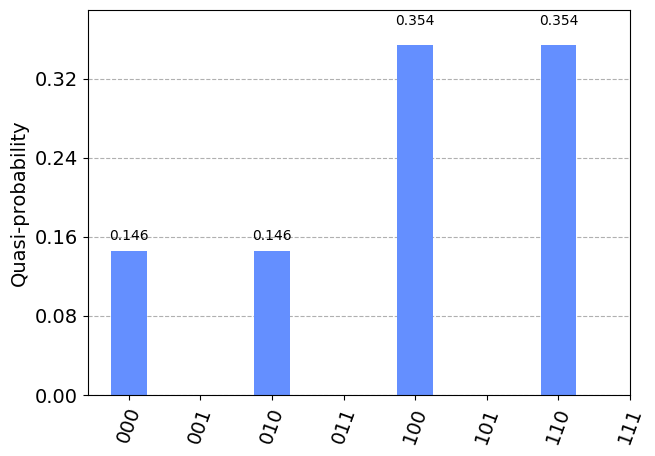

In [91]:
size = 3
test = QuantumCircuit(size)
test.rz(1/3,nr)
test.ry(2/3,nr)
test.cnot(target_qubit=1,control_qubit=2)
test.ry(4/3,nr)
test.cnot(target_qubit=0,control_qubit=1)
test.x(nr)
test.h(nr)
test.rx(2/7,nr)

test2 = SYMQCircuit(size)
test2.add_rz(nr,1/3)
test2.add_ry(nr,2/3)
test2.add_cnot(target_qubit=1,control_qubit=2)
test2.add_ry(nr,4/3)
test2.add_cnot(target_qubit=0,control_qubit=1)
test2.add_x(nr)
test2.add_h(nr)
test2.add_rx(nr,2/7)

probabilities = test2.get_state_probabilities()
plot_histogram(probabilities)

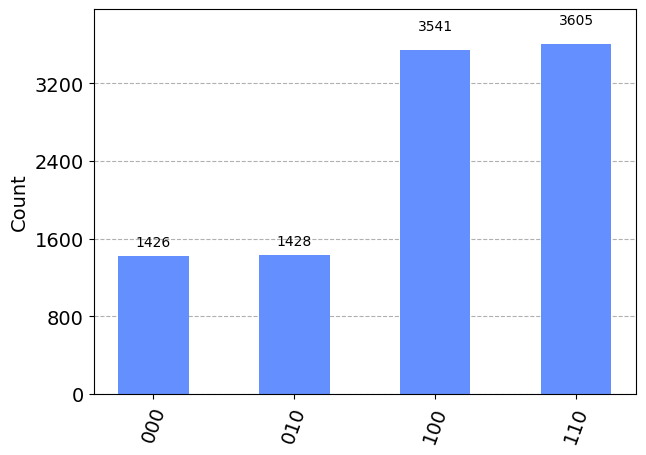

In [92]:
meas = QuantumCircuit(size,size)
meas.barrier(range(size))
meas.measure(range(size), range(size))
test.add_register(meas.cregs[0])
qc = test.compose(meas)
backend_sim = Aer.get_backend('statevector_simulator')
job_sim = backend_sim.run(transpile(qc, backend_sim), shots=10000)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
reversed_states = {}
for key in list(counts.keys()):
    reversed_states[key[::-1]] = counts[key]
plot_histogram(reversed_states)

#### SWAP:

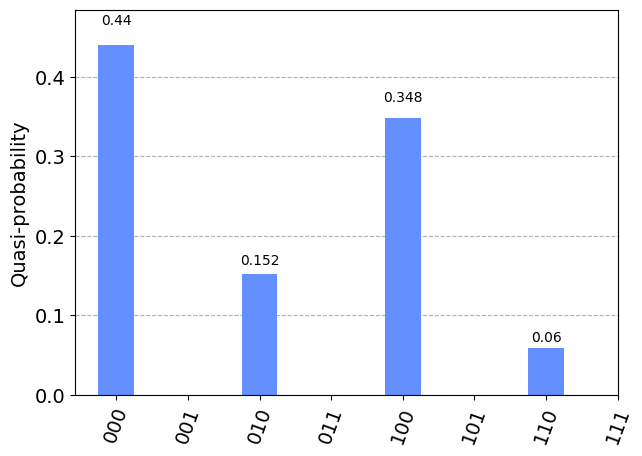

In [93]:
size = 3
test = QuantumCircuit(size)
test.rz(1/3,nr)
test.ry(2/3,nr)
test.swap(qubit1=0,qubit2=nr)
test.ry(4/3,nr)
test.cnot(target_qubit=0,control_qubit=1)
test.x(nr)
test.h(nr)
test.rx(2/7,nr)

test2 = SYMQCircuit(size)
test2.add_rz(nr,1/3)
test2.add_ry(nr,2/3)
test2.add_swap(qubit_1=0,qubit_2=nr)
test2.add_ry(nr,4/3)
test2.add_cnot(target_qubit=0,control_qubit=1)
test2.add_x(nr)
test2.add_h(nr)
test2.add_rx(nr,2/7)

probabilities = test2.get_state_probabilities()
plot_histogram(probabilities)

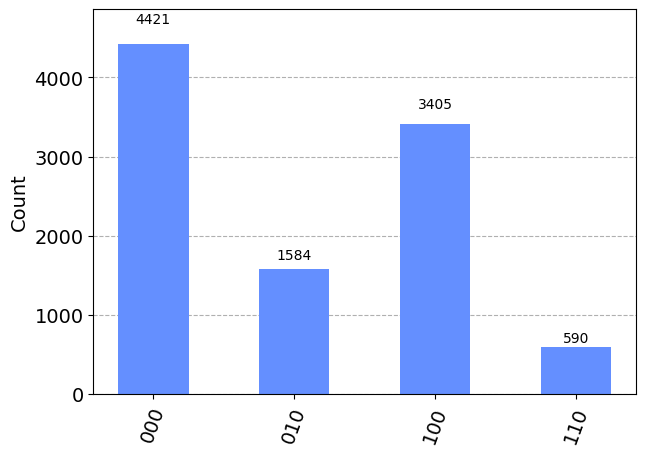

In [94]:
meas = QuantumCircuit(size,size)
meas.barrier(range(size))
meas.measure(range(size), range(size))
test.add_register(meas.cregs[0])
qc = test.compose(meas)
backend_sim = Aer.get_backend('statevector_simulator')
job_sim = backend_sim.run(transpile(qc, backend_sim), shots=10000)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
reversed_states = {}
for key in list(counts.keys()):
    reversed_states[key[::-1]] = counts[key]
plot_histogram(reversed_states)

#### RZZ:

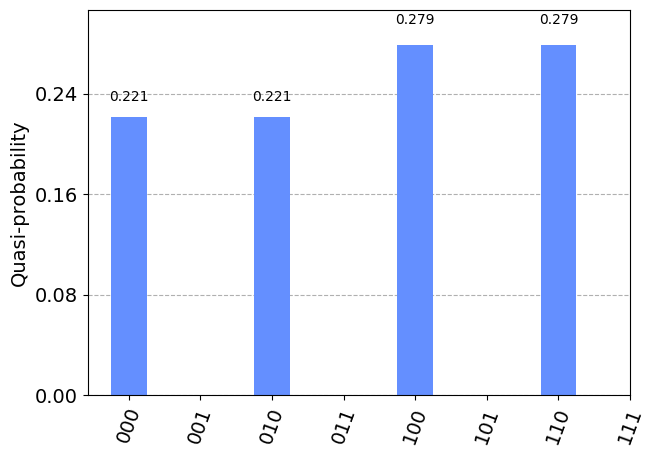

In [95]:
size = 3
test = QuantumCircuit(size)
test.rz(1/3,nr)
test.ry(2/3,nr)
test.rzz(theta=np.pi/3,qubit1=0,qubit2=nr)
test.ry(4/3,nr)
test.cnot(target_qubit=0,control_qubit=1)
test.x(nr)
test.h(nr)
test.rx(2/7,nr)

test2 = SYMQCircuit(size)
test2.add_rz(nr,1/3)
test2.add_ry(nr,2/3)
test2.add_rzz(qubit_1=0,qubit_2=nr, angle=np.pi/3)
test2.add_ry(nr,4/3)
test2.add_cnot(target_qubit=0,control_qubit=1)
test2.add_x(nr)
test2.add_h(nr)
test2.add_rx(nr,2/7)

probabilities = test2.get_state_probabilities()
plot_histogram(probabilities)

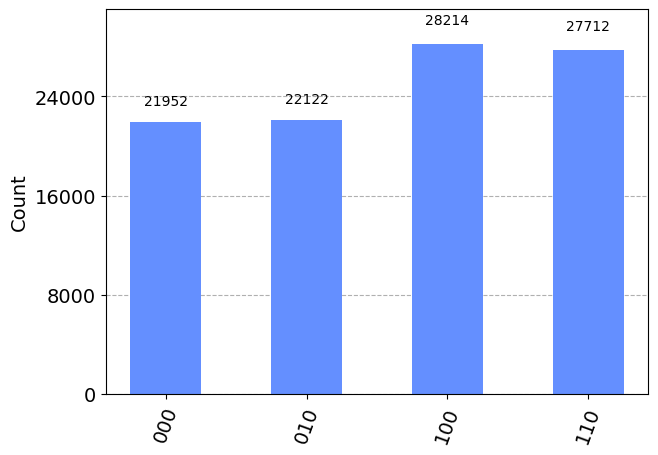

In [96]:
meas = QuantumCircuit(size,size)
meas.barrier(range(size))
meas.measure(range(size), range(size))
test.add_register(meas.cregs[0])
qc = test.compose(meas)
backend_sim = Aer.get_backend('statevector_simulator')
job_sim = backend_sim.run(transpile(qc, backend_sim), shots=100000)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
reversed_states = {}
for key in list(counts.keys()):
    reversed_states[key[::-1]] = counts[key]
plot_histogram(reversed_states)